In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
from IPython.display import display, HTML

import pandas as pd
import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

# Performance History

The plot below shows the gflops history with a series for each system/partition/environment combination. Where performance logs include a git reference (as performance variable "git_ref") this is used to annotate the data point.

Hpl_all: no performance logs found


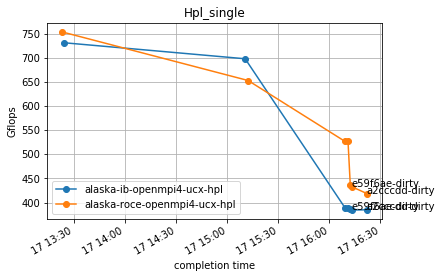

In [6]:

for test in ['Hpl_single', 'Hpl_all']:
    perf_records = modules.utils.load_perf_logs('../perflogs', test, '.log')
    if perf_records is None:
        print('%s: no performance logs found' % test)
        continue
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for spe, data in perf_records.groupby(['sysname', 'partition', 'environ']):
        # turn data round to give a column for *each* perf_var (Gflops, git_ref):
        df = data.pivot(index='completion_time', columns='perf_var', values='perf_value')
        # plot gflops history - x is index (default):
        df.plot(ax=ax, y='Gflops', style=['o-'], label='-'.join(spe))
        # annotate points with git_ref:
        for x, y, ref in zip(df.index, df['Gflops'], df['git_ref']):
            if not pd.isnull(ref):
                ax.annotate(ref, (x, y))
    ax.set_title(test)
    ax.set_xlabel('completion time')
    ax.set_ylabel('Gflops')
    ax.legend()
    ax.grid()    